In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [3]:
#Let's import Dataset
df=pd.read_csv("study.csv")

In [4]:

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
#Renaming Column Name based on the tutorial following for simplicity
df=df.rename(columns={"race/ethnicity": "race_ethnicity"})
df=df.rename(columns={"parental level of education":"parental_level_of_education"})
df=df.rename(columns={"test preparation course":"test_preparation_course"})
df=df.rename(columns={"math score":"math_score"})
df=df.rename(columns={"reading score":"reading_score"})
df=df.rename(columns={"writing score":"writing_score"})

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
print(f"Shape of the Dataset: {df.shape}")
print(f"Total Number of Datapoints: {df.size}")
print(f"Dimension of the Dataset: {df.ndim}")

Shape of the Dataset: (1000, 8)
Total Number of Datapoints: 8000
Dimension of the Dataset: 2


In [25]:
#Checking the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
#Checking for missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [27]:
#Checking the number of Unique Values in Each Columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [30]:
#Fetching the cateogries of Each Categorical Column
print(f"{len(df['gender'].unique())} Categories in 'gender' are: {df['gender'].unique()}")

print(f"\n{len(df['race_ethnicity'].unique())} Categories in 'race_ethnicity' are: {df['race_ethnicity'].unique()}")

print(f"\n{len(df['parental_level_of_education'].unique())} Categories in 'parental_level_of_education' are: {df['parental_level_of_education'].unique()}")

print(f"\n{len(df['lunch'].unique())} Categories in 'lunch Column' and the Categories are: {df['lunch'].unique()}")

print(f"\n{len(df['test_preparation_course'].unique())} Categories in 'test_preparation_course' are: {df['test_preparation_course'].unique()}")

2 Categories in 'gender' are: ['female' 'male']

5 Categories in 'race_ethnicity' are: ['group B' 'group C' 'group A' 'group D' 'group E']

6 Categories in 'parental_level_of_education' are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

2 Categories in 'lunch Column' and the Categories are: ['standard' 'free/reduced']

2 Categories in 'test_preparation_course' are: ['none' 'completed']


In [31]:
#Checking the Description of Numeric Columns
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [35]:
#Defining Numerical and Categorical Features

numeric_features=[feature for feature in df.columns if df[feature].dtype != "O"]
print(f"There are {len(numeric_features)} Numeric Features: {numeric_features}")

categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]
print(f"\nThere are {len(categorical_features)} Categoical Features: {categorical_features}")

There are 3 Numeric Features: ['math_score', 'reading_score', 'writing_score']

There are 5 Categoical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [39]:
#Adding Columns for "Total Score" and "Average"

df["total score"]=df['math_score'] + df['reading_score'] + df['writing_score']

df['average']=df['total score']/3


In [40]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [ ]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of Students with Full Marks in Reading: {reading_full}")
print(f"\nNumber of Students with Full Marks in Writing: {writing_full}")
print(f"\nNumber of Students with Full Marks in Maths: {math_full}")

Number of Students with Full Marks in Reading: 17

Number of Students with Full Marks in Writing: 14

Number of Students with Full Marks in Maths: 7


In [ ]:
reading_ful = df[df['reading_score'] <= 20]['average'].count()
writing_full = df[df['writing_score'] <= 20]['average'].count()
math_full = df[df['math_score'] <= 20]['average'].count()

print(f"Number of Students with 'Less Equal to 20' Marks in Reading: {reading_full}")
print(f"\nNumber of Students with 'Less Equal to 20' Marks in Writing: {writing_full}")
print(f"\nNumber of Students with 'Less Equal to 20' Marks in Maths: {math_full}")

Number of Students with 'Less Equal to 20' Marks in Reading: 1

Number of Students with 'Less Equal to 20' Marks in Writing: 3

Number of Students with 'Less Equal to 20' Marks in Maths: 4


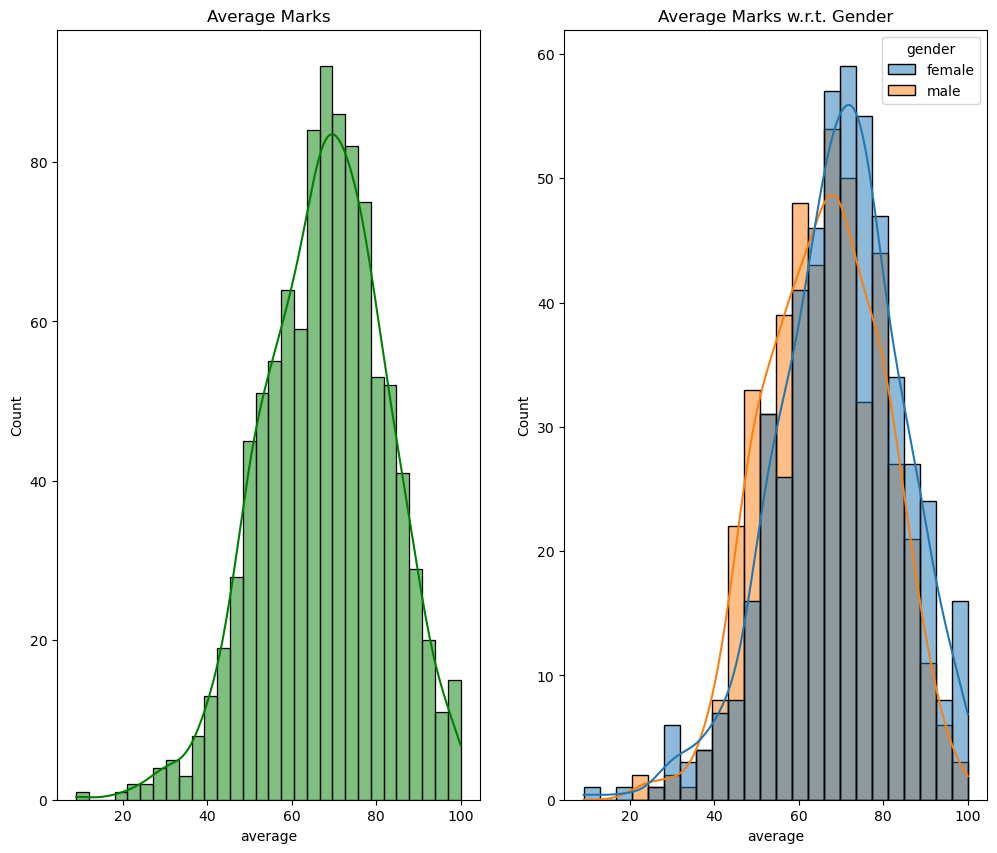

In [68]:
#Histograms & KDE - average marks vs average marks wrt gender"

fig, axs = plt.subplots(1,2, figsize=(12,10))

plt.subplot(121)
plt.title("Average Marks")
sns.histplot(data=df, x="average", bins=30, kde=True, color='g')

plt.subplot(122)
plt.title("Average Marks w.r.t. Gender")
sns.histplot(data=df, x="average", kde=True, hue="gender")

plt.show()

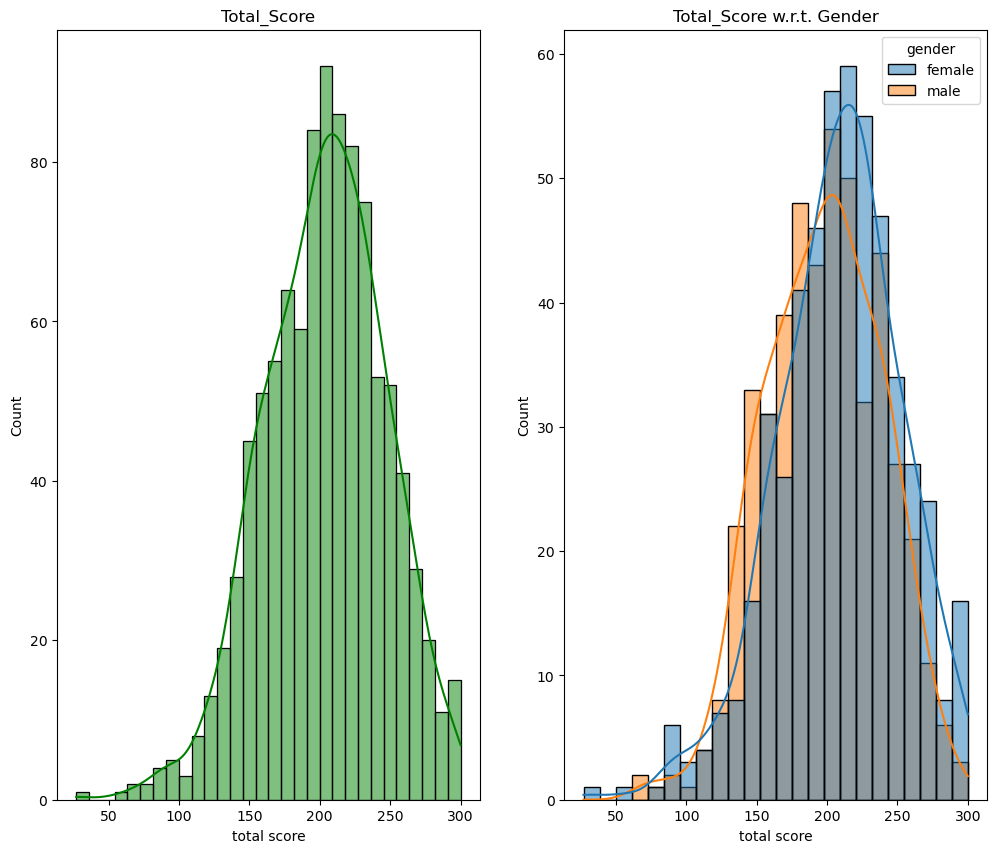

In [69]:
#Histograms & KDE 

fig, axs = plt.subplots(1,2, figsize=(12,10))

plt.subplot(121)
plt.title("Total_Score")
sns.histplot(data=df, x="total score", bins=30, kde=True, color='g')
 
plt.subplot(122)
plt.title("Total_Score w.r.t. Gender")
sns.histplot(data=df, x="total score", kde=True, hue="gender")

plt.show()

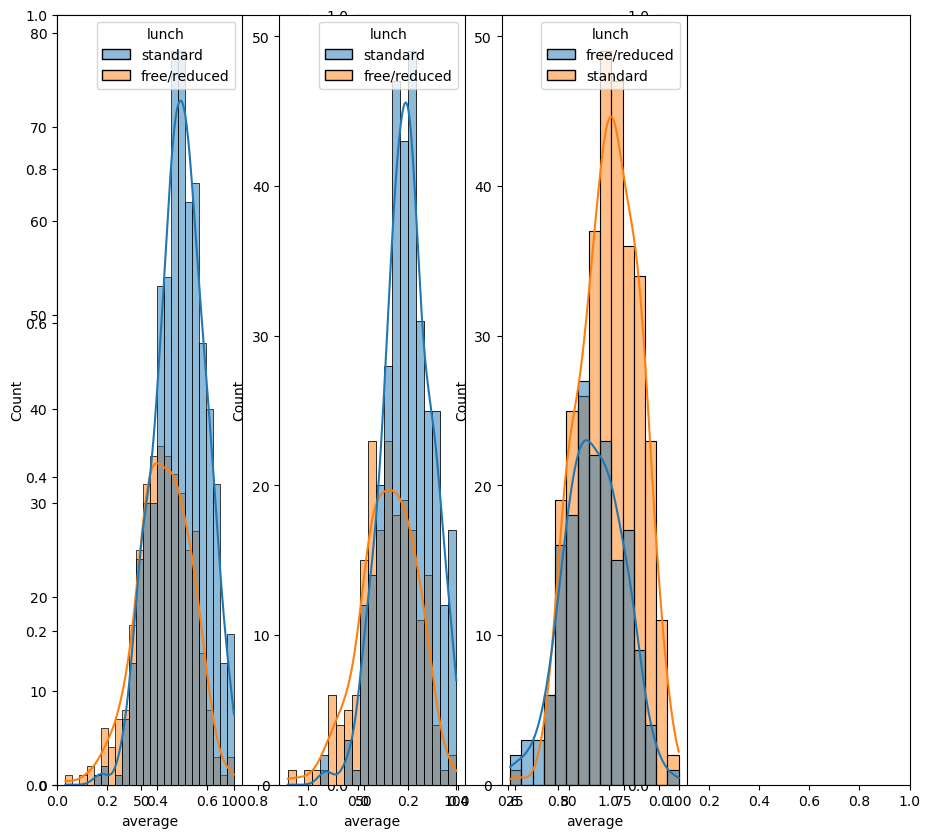

In [101]:
plt.subplots(1,3,figsize=(11,10))

plt.subplot(141)
sns.histplot(data=df, x="average", kde=True, hue="lunch")

plt.subplot(142)
sns.histplot(data=df[df.gender=="female"], x="average", kde=True, hue="lunch")

plt.subplot(143)
sns.histplot(data=df[df.gender=="male"], x="average", kde=True, hue="lunch" )

plt.show()

In [ ]:
aa